In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import multivariate_normal

In [2]:
def prepare_dataset(n1, mu1, variance1, n2, mu2, variance2):
    df1 = DataFrame(multivariate_normal(mu1, np.eye(2)*variance1 ,n1),
                    columns=['x','y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(mu2, np.eye(2)*variance2, n2),
                    columns=['x','y'])
    df2['type'] = -1
    df = pd.concat([df1,df2], ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

In [3]:
train_set = prepare_dataset(20, [15,10], 15, 30, [0,0], 15)

In [4]:
train_set.head(10)

,x,y,type
0,3.153045,3.130352,-1
1,15.825834,13.587521,1
2,12.813575,8.599196,1
3,0.675097,-1.206019,-1
4,-4.510967,-1.451511,-1
5,-10.572530,1.093595,-1
6,11.546414,10.606383,1
7,-2.420563,-1.865068,-1
8,6.110758,-0.954161,-1
9,7.666255,-1.576934,-1


In [5]:
def prepare_dataset_debug(n1, mu1, variance1, n2, mu2, variance2):
    df1 = DataFrame(multivariate_normal(mu1, np.eye(2)*variance1 ,n1),
                    columns=['x','y'])
    df1['type'] = 1
    
    print '\ndf1:'
    print df1.head()
    
    df2 = DataFrame(multivariate_normal(mu2, np.eye(2)*variance2, n2),
                    columns=['x','y'])
    df2['type'] = -1
    
    print '\ndf2:'
    print df2.head()
        
    df = pd.concat([df1,df2], ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

In [6]:
train_set = prepare_dataset_debug(20, [15,10], 15, 30, [0,0], 15)


df1:
           x          y  type
0  14.477726   7.959437     1
1  13.690463   4.315477     1
2  16.258191   4.732707     1
3  22.279339  13.984933     1
4  15.553373   7.499926     1

df2:
          x         y  type
0 -1.280968 -1.464140    -1
1 -3.820834  1.561394    -1
2  1.613477  2.267638    -1
3 -4.554196 -3.150507    -1
4  2.430743  2.017678    -1


In [7]:
def run_train(train_set):
    # パラメータの初期値とbias項の設定
    w0 = w1 = w2 = 0.0
    bias = 0.5 * (train_set.x.mean() + train_set.y.mean())

    # Iterationを実施
    paramhist = DataFrame([[w0,w1,w2]], columns=['w0','w1','w2'])
    for i in range(30):
        for index, point in train_set.iterrows():
            x, y, type = point.x, point.y, point.type
            if type * (w0*bias + w1*x + w2*y) <= 0:
                w0 += type * bias
                w1 += type * x
                w2 += type * y
        paramhist = paramhist.append(Series([w0,w1,w2], ['w0','w1','w2']),
                                     ignore_index=True)
    
    # 判定誤差の計算
    err = 0
    for index, point in train_set.iterrows():
        x, y, type = point.x, point.y, point.type
        if type * (w0*bias + w1*x + w2*y) <= 0:
            err += 1
    err_rate = err * 100 / len(train_set)
    
    return paramhist, err_rate

In [8]:
paramhist, err_rate = run_train(train_set)
paramhist.head(10)

,w0,w1,w2
0,0.0,0.000000,0.000000
1,-7.0,10.226106,4.370980
2,-8.0,19.382292,10.881953
3,-11.0,23.252686,10.119207
4,-14.0,24.589077,10.408212
5,-17.0,25.925469,10.697217
6,-20.0,13.367002,-1.991919
7,-21.0,11.783361,-1.673432
8,-22.0,11.594949,0.357970
9,-22.0,14.976053,1.642384


In [9]:
def show_result(subplot, train_set, w0, w1, w2, err_rate):
    train_set1 = train_set[train_set['type']==1]
    train_set2 = train_set[train_set['type']==-1]
    bias = 0.5 * (train_set.x.mean() + train_set.y.mean())
    ymin, ymax = train_set.y.min()-5, train_set.y.max()+10
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10

    subplot.set_ylim([ymin-1, ymax+1])
    subplot.set_xlim([xmin-1, xmax+1])
    subplot.scatter(train_set1.x, train_set1.y, marker='o', label=None)
    subplot.scatter(train_set2.x, train_set2.y, marker='x', label=None)

    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * w1 / w2 - bias * w0 / w2
    label = "ERR %.2f%%" % err_rate
    subplot.plot(linex, liney, label=label, color='red')
    subplot.legend(loc=1)

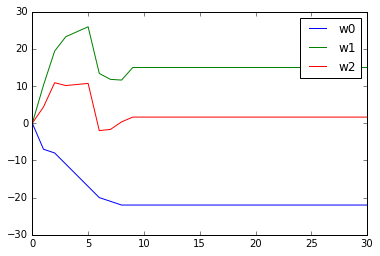

In [10]:
paramhist.plot().legend(loc=1)

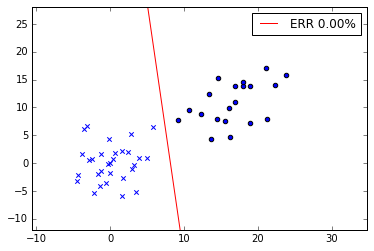

In [11]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
params = paramhist[-1:]
w0, w1, w2 = float(params.w0), float(params.w1), float(params.w2)
show_result(subplot, train_set, w0, w1, w2, err_rate)